In [1]:
import nltk
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import glob
import os

import pandas as pd
from deep_translator import GoogleTranslator #, DeeplTranslator, PonsTranslator
from langdetect import detect  

import time

import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords

In [23]:
def clean_text(text):
    text = str(text)
    text = text.lower()
    text = re.sub('\([m|f|d|x|w]/[m|f|d|x|w]/[m|f|d|x|w]\)', '', text)
    text = re.sub(r"[()<>/]", ' ', text) # sub ()<>&/ to comma and space
    text = re.sub(r"&", 'and', text) # sub ()<>&/ to comma and space
    text = re.sub(r"[?!]", '. ', text) # sub ?! to dot and space
    text = re.sub("e\.g\.", '', text)
    text = re.sub("[\t\n\r\f\v]+", ". ", text)
    text = re.sub('\W+\.', '.', text) # remove the empty space before a dot
    text = re.sub('\W+\,', ',', text) # remove the empty space before a comma
    text = re.sub('[,\.]+\.+', '.', text) # sub multiple dots to one dot
    text = re.sub(' +',' ',text) # replace multiple whitespace by one whitespace
    
    text = [WordNetLemmatizer().lemmatize(token, "v") for token in text] #Lemmatization
    text = "".join(text)
    
    # Remove non english word
    # text = " ".join(w for w in nltk.wordpunct_tokenize(text) \
    #      if w.lower() in words or not w.isalpha())
    text = text.strip()
    return text

In [3]:
df_data = pd.read_csv('data_full_translate_to_en_de_23_2907_only_data.csv')

In [6]:
df_data.shape

(4016, 8)

In [12]:
df_data.drop_duplicates(subset=['position', 'company_name', 'location'], inplace=True)

In [13]:
df_data.to_csv('data_full_translate_to_en_de_23_2907_only_data_drop_duplicates.csv')

In [14]:
df_data.shape

(3512, 8)

# Count number of job post in each platform

In [60]:
df_data[df_data.link.str.contains('glassdoor')].shape

(362, 8)

In [61]:
df_data[df_data.link.str.contains('linkedin')].shape

(1356, 8)

In [62]:
df_data[df_data.link.str.contains('indeed')].shape

(1794, 8)

(-0.5, 399.5, 199.5, -0.5)

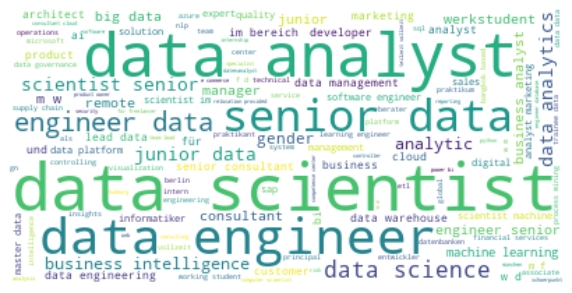

In [16]:
text = ' '.join(df_data['position'].apply(clean_text))
plt.figure(figsize=(10,10))
wordcloud = WordCloud(max_font_size=200, background_color="white").generate(text) 
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

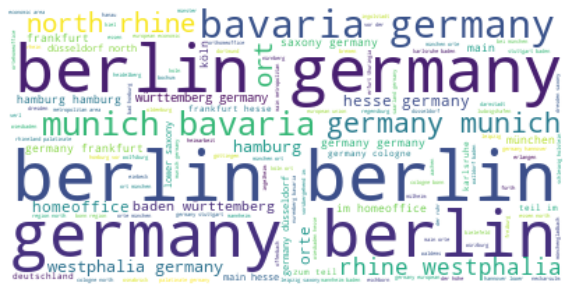

In [18]:
text = ' '.join(df_data['location'].apply(clean_text))
plt.figure(figsize=(10,10))
wordcloud = WordCloud(max_font_size=200, background_color="white").generate(text) 
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

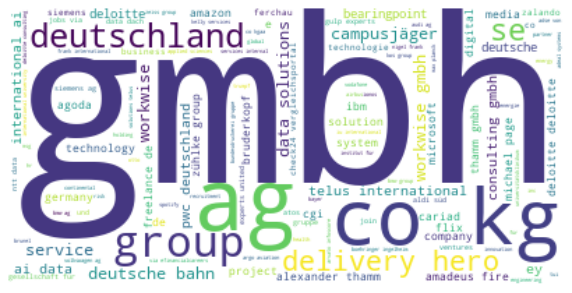

In [24]:
text = ' '.join(df_data['company_name'].apply(clean_text))
plt.figure(figsize=(10,10))
wordcloud = WordCloud(max_font_size=200, background_color="white").generate(text) 
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')

In [48]:
df_data_analyst = df_data[df_data['position'].str.contains('(Data.*analyst)|(Data.*Analytics)|(Analyst.*Data)', case=False)]

C:\Users\Pham Thi Ngan\AppData\Local\Temp\ipykernel_17288\140123114.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_data_analyst = df_data[df_data['position'].str.contains('(Data.*analyst)|(Data.*Analytics)|(Analyst.*Data)', case=False)]


In [49]:
df_data_scientist = df_data[df_data['position'].str.contains('(Data.*Scientist)|(Data.*Science)|(Scientist.*Data)', case=False)]

C:\Users\Pham Thi Ngan\AppData\Local\Temp\ipykernel_17288\4231833213.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_data_scientist = df_data[df_data['position'].str.contains('(Data.*Scientist)|(Data.*Science)|(Scientist.*Data)', case=False)]


In [54]:
df_data_engineer = df_data[df_data['position'].str.contains('(Data.*Engineer)|(Engineer.*Data)', case=False, regex=True)]

C:\Users\Pham Thi Ngan\AppData\Local\Temp\ipykernel_17288\3567542727.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_data_engineer = df_data[df_data['position'].str.contains('(Data.*Engineer)|(Engineer.*Data)', case=False, regex=True)]


In [46]:
list(df_data[(df_data['position'].str.contains('(Data.*Analyst)|(Data.*Analytics)|(Analyst.*Data)', case=False, regex=True)==False) & 
        (df_data['position'].str.contains('(Data.*Scientist)|(Data.*Science)|(Scientist.*Data)', case=False, regex=True)==False) &
       (df_data['position'].str.contains('(Data.*Engineer)|(Engineer.*Data)', case=False, regex=True)==False)].position)

C:\Users\Pham Thi Ngan\AppData\Local\Temp\ipykernel_17288\580822397.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  list(df_data[(df_data['position'].str.contains('(Data.*Analyst)|(Data.*Analytics)|(Analyst.*Data)', case=False, regex=True)==False) &
C:\Users\Pham Thi Ngan\AppData\Local\Temp\ipykernel_17288\580822397.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  (df_data['position'].str.contains('(Data.*Scientist)|(Data.*Science)|(Scientist.*Data)', case=False, regex=True)==False) &
C:\Users\Pham Thi Ngan\AppData\Local\Temp\ipykernel_17288\580822397.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  (df_data['position'].str.contains('(Data.*Engineer)|(Engineer.*Data)', case=False, regex=True)==False)].position)


['CONSULTANT DATA WAREHOUSING & BUSINESS INTELLIGENCE (M/W/D)',
 'Business Intelligence Architect - Data / Python / SQL (m/w/d)',
 'Berater Digital Consulting SAP - Data Intelligence (w/m/d)',
 'Enterprise Data Architect (m/f/d)',
 'IT Data Architect (f/m/d)',
 'Working Student (m/f/t) Data IT',
 'Digitalization & Data Expert EU Taxonomy (f/m/d)',
 'Senior Business Analyst - Datenbanken / SQL / Business Devel...',
 'Senior Business Analyst - Datenbanken / SQL / Business Devel...',
 'Business Intelligence Manager - Datenanalyse / SQL / PowerBI...',
 'Junior Business Consultant - IT / Datenbank / Projektleitung...',
 'Junior Business Consultant - IT / Datenbank / Projektleitung...',
 'Junior Business Consultant - IT / Datenbank / Projektleitung...',
 'Für Freelancer: Business Analyst - Bewegungsdaten / Zählerst...',
 'Data Intelligence Project Manager',
 'Business Intelligence / Data Warehouse Developer (w/m/d)',
 'Lead (f/m/d) of Data Excellence',
 'Datenbankentwickler Business Intellig

In [56]:
df_data_scientist.company_name.value_counts().head(10)

Delivery Hero              21
Deloitte                   14
Workwise GmbH              13
Zühlke Group               13
Campusjäger by Workwise    12
Deutsche Bahn              11
ALDI SÜD                   10
IBM                         8
EY                          8
Brunel                      8
Name: company_name, dtype: int64

In [52]:
df_data_analyst.company_name.value_counts()

TELUS International AI Data Solutions    32
Deloitte                                 25
EY                                       20
PwC Deutschland                          19
Agoda                                    16
                                         ..
Symrise                                   1
Audible                                   1
7Mind GmbH                                1
Stratosphere Games GmbH                   1
A. Lange & Söhne                          1
Name: company_name, Length: 765, dtype: int64

In [57]:
df_data_engineer.company_name.value_counts().head(10)

BRUDERKOPF              17
Alexander Thamm GmbH    15
Deutsche Bahn           15
Deloitte                14
Michael Page            11
Delivery Hero           10
CARIAD                  10
Zalando                  9
Flix                     9
Workwise GmbH            9
Name: company_name, dtype: int64

In [58]:
df_data[df_data['company_name']=='TELUS International AI Data Solutions']

,position,company_name,location,job_description,link,language,job_description_en,job_description_de
1087,Data Analyst (Czech),TELUS International AI Data Solutions,European Union,TELUS International AI-Data Solutions partners...,https://www.linkedin.com/jobs/view/3178406801/...,en,TELUS International AI-Data Solutions partners...,TELUS International AI-Data Solutions arbeitet...
1093,Data Analyst - Czech (Part Time),TELUS International AI Data Solutions,European Economic Area,TELUS International AI-Data Solutions partners...,https://www.linkedin.com/jobs/view/3181628372/...,en,TELUS International AI-Data Solutions partners...,TELUS International AI-Data Solutions arbeitet...
1105,Data Analyst (Czech) | Work from home,TELUS International AI Data Solutions,European Economic Area,TELUS International AI-Data Solutions partners...,https://www.linkedin.com/jobs/view/3178412690/...,en,TELUS International AI-Data Solutions partners...,TELUS International AI-Data Solutions arbeitet...
1108,Data Analyst - CZECH | Part Time,TELUS International AI Data Solutions,European Economic Area,TELUS International AI-Data Solutions partners...,https://www.linkedin.com/jobs/view/3177193934/...,en,TELUS International AI-Data Solutions partners...,TELUS International AI-Data Solutions arbeitet...
1115,Data Analyst - Czech Speaker (CZ) PART TIME,TELUS International AI Data Solutions,European Economic Area,TELUS International AI-Data Solutions partners...,https://www.linkedin.com/jobs/view/3179503725/...,en,TELUS International AI-Data Solutions partners...,TELUS International AI-Data Solutions arbeitet...
1116,Data Analyst - Czech Speaker (CZ),TELUS International AI Data Solutions,European Union,TELUS International AI-Data Solutions partners...,https://www.linkedin.com/jobs/view/3179506040/...,en,TELUS International AI-Data Solutions partners...,TELUS International AI-Data Solutions arbeitet...
1117,Data Analyst - Danish (DK),TELUS International AI Data Solutions,European Union,TELUS International AI-Data Solutions partners...,https://www.linkedin.com/jobs/view/3179755319/...,en,TELUS International AI-Data Solutions partners...,TELUS International AI-Data Solutions arbeitet...
1158,Data Analyst - HUNGARIAN | Part Time,TELUS International AI Data Solutions,European Economic Area,TELUS International AI-Data Solutions partners...,https://www.linkedin.com/jobs/view/3177201494/...,en,TELUS International AI-Data Solutions partners...,TELUS International AI-Data Solutions arbeitet...
1164,Data Analyst - Hungarian (HU) PART TIME,TELUS International AI Data Solutions,European Economic Area,ELUS International AI-Data Solutions partners ...,https://www.linkedin.com/jobs/view/3179562045/...,en,ELUS International AI-Data Solutions partners ...,ELUS International AI-Data Solutions arbeitet ...
1507,Data Analyst - Czech,TELUS International AI Data Solutions,European Union,TELUS International AI-Data Solutions partners...,https://www.linkedin.com/jobs/view/3181624512/...,en,TELUS International AI-Data Solutions partners...,TELUS International AI-Data Solutions arbeitet...
